In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")


In [8]:
df = pd.read_csv("D:\Gold\gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [9]:
df.shape

(847, 2)

In [10]:
print(f"Date range of gold prices available from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [11]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [12]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [13]:
"""sns.lineplot(data = df, x = "month", y = 'Price')
plt.title("Monthly Gold Prices")
plt.grid()
plt.show()"""



'sns.lineplot(data = df, x = "month", y = \'Price\')\nplt.title("Monthly Gold Prices")\nplt.grid()\nplt.show()'

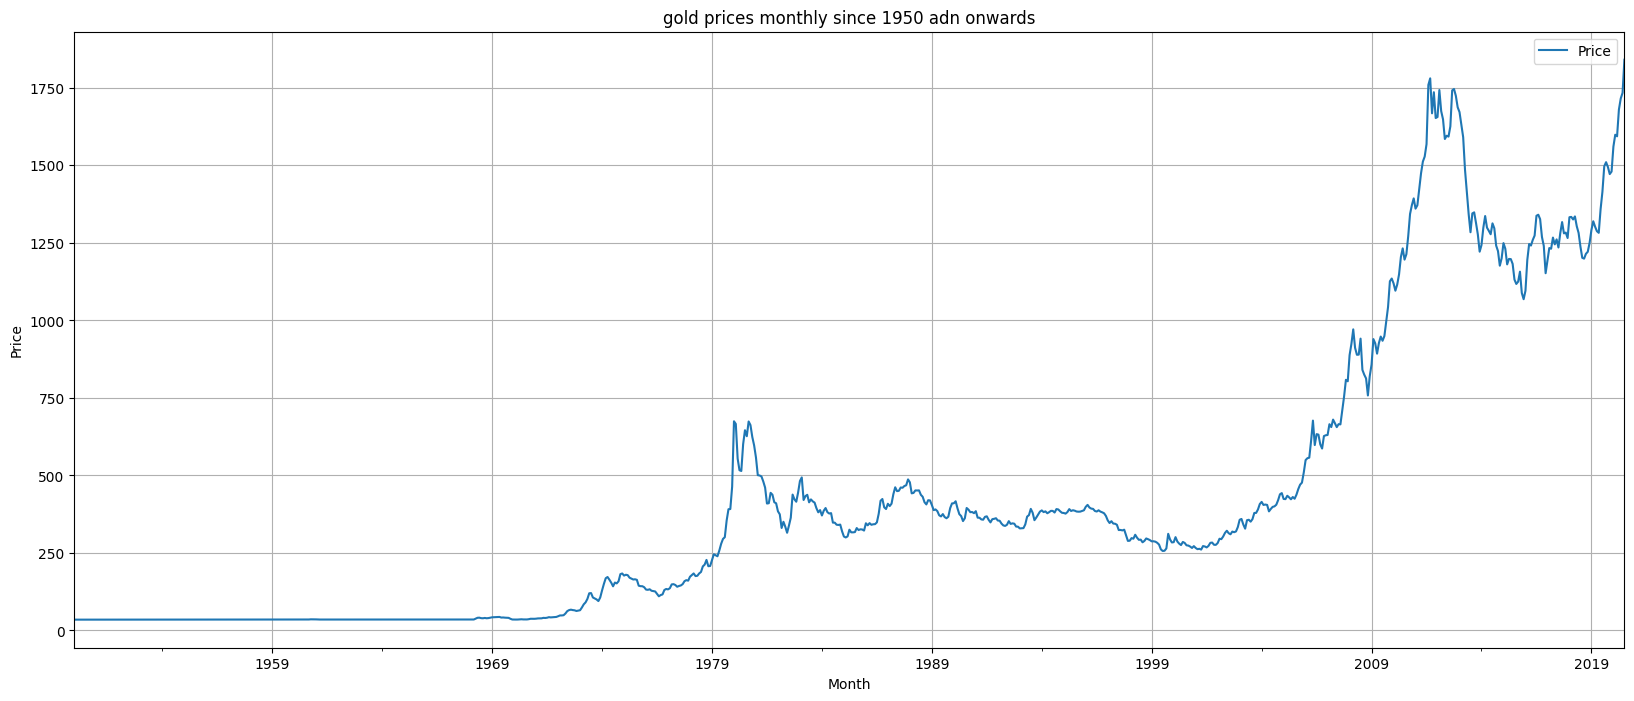

In [14]:
df.plot(kind='line', y='Price', figsize=(20,8))
plt.grid()
plt.xlabel("Month")  # x-axis will be the index (months)
plt.ylabel("Price")
plt.title("gold prices monthly since 1950 adn onwards")
plt.show()

In [15]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


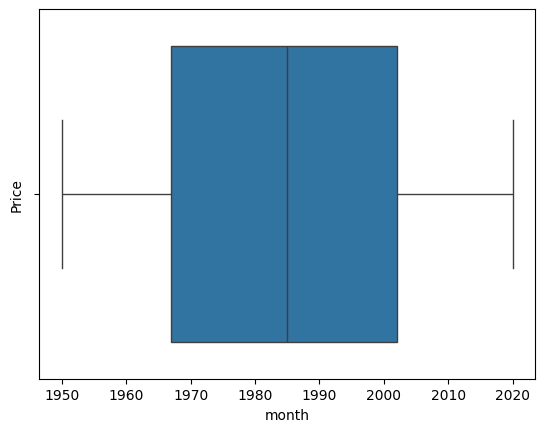

In [16]:
plt.plot(figsize = (25,8))
sns.boxplot(data = df, x = df.index.year)
plt.ylabel("Price")
plt.show()

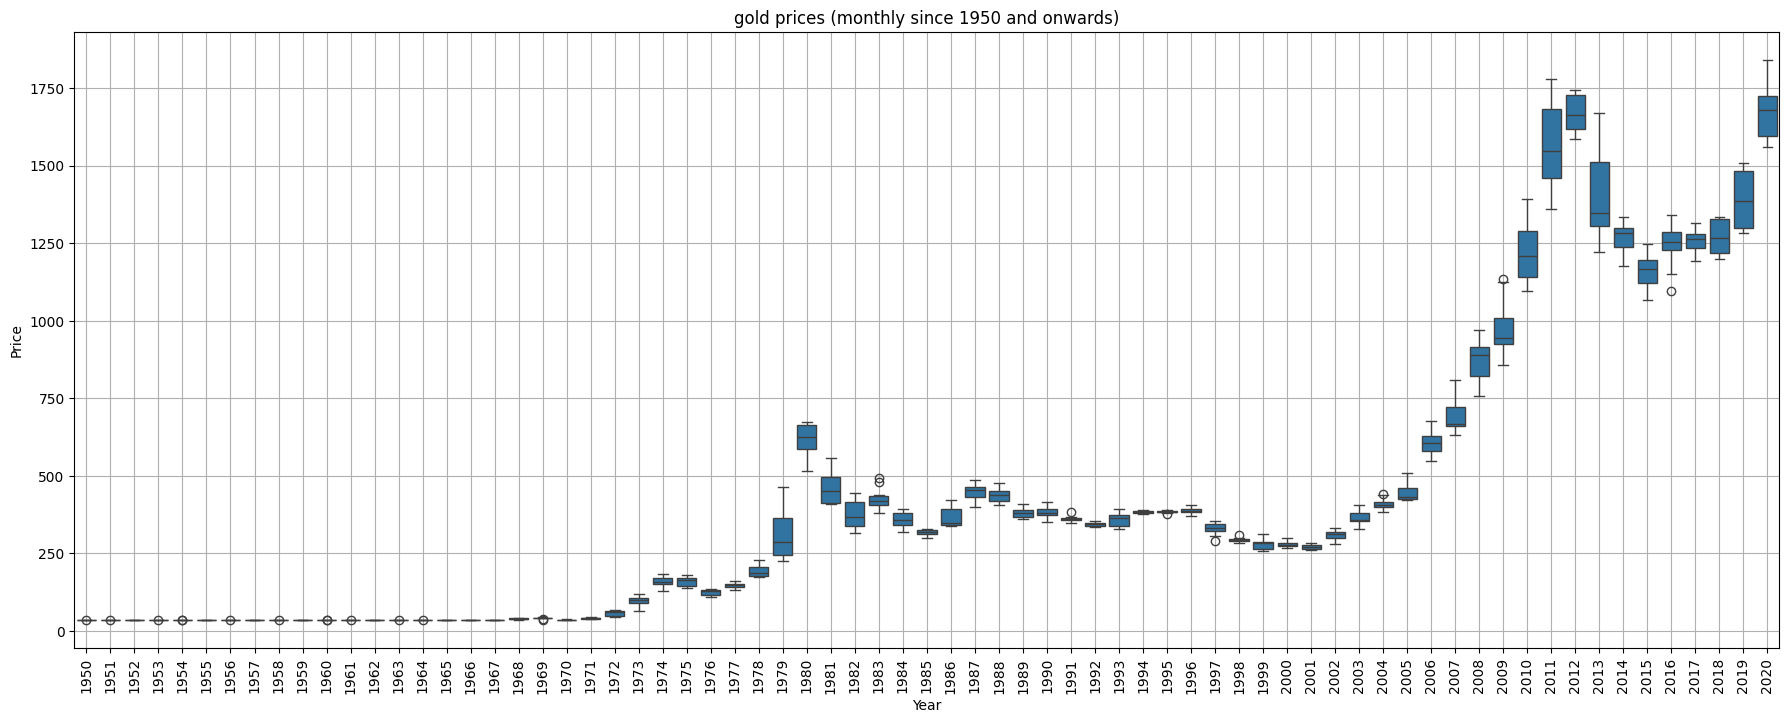

In [17]:
_,ax = plt.subplots(figsize = (22,8))
sns.boxplot(data = df, x = df.index.year,y=df.values[:,0], ax = ax)
plt.title("gold prices (monthly since 1950 and onwards)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()
plt.show()



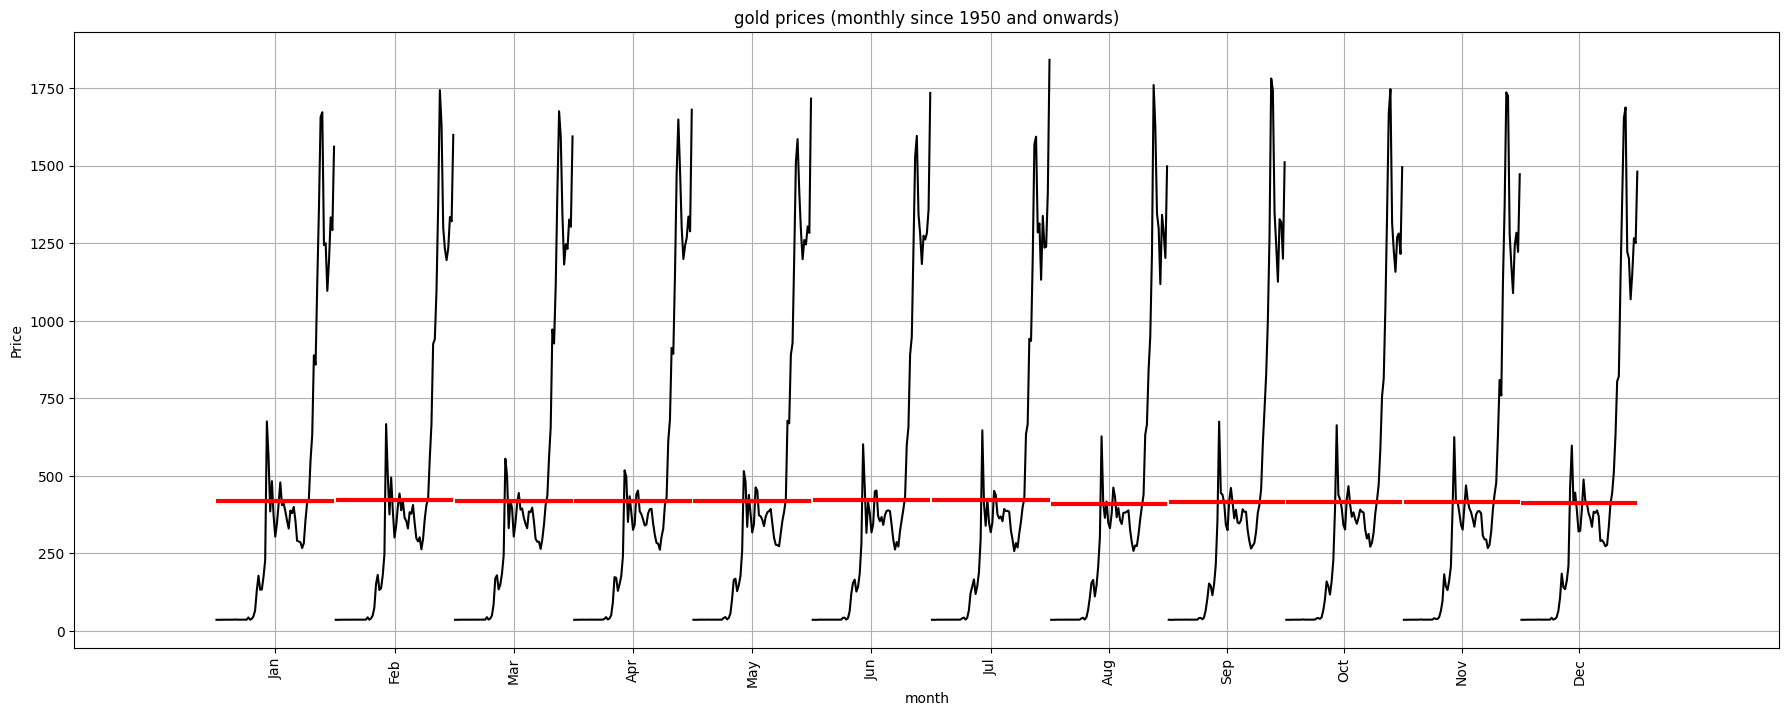

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))

month_plot(df, ylabel = 'gold price', ax = ax)
plt.title("gold prices (monthly since 1950 and onwards)")
plt.xlabel("month")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

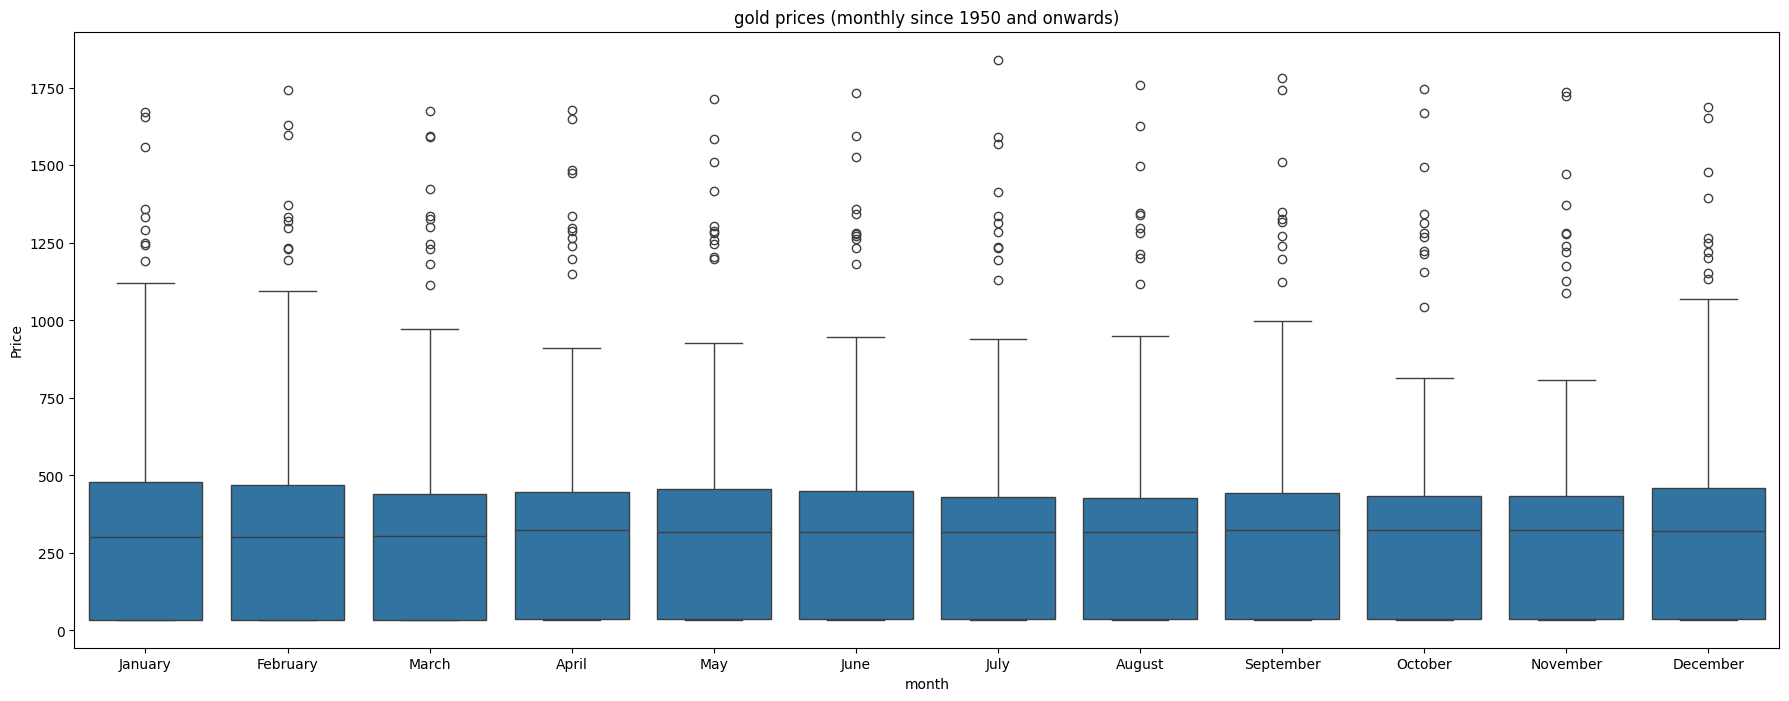

In [19]:
_,ax = plt.subplots(figsize = (22,8))
sns.boxplot(data = df, x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title("gold prices (monthly since 1950 and onwards)")
plt.xlabel("month")
plt.ylabel("Price")
plt.show()


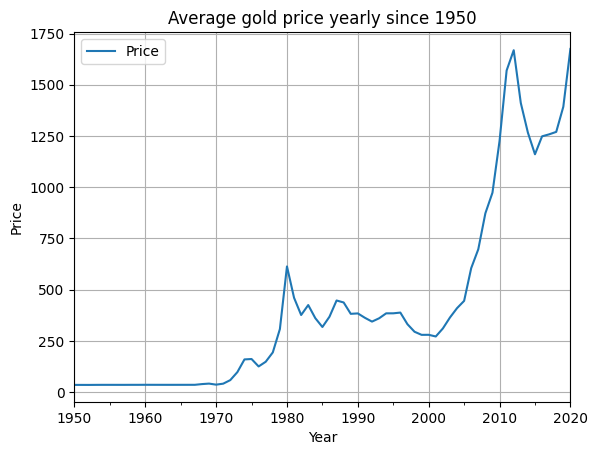

In [20]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Average gold price yearly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()
plt.show()


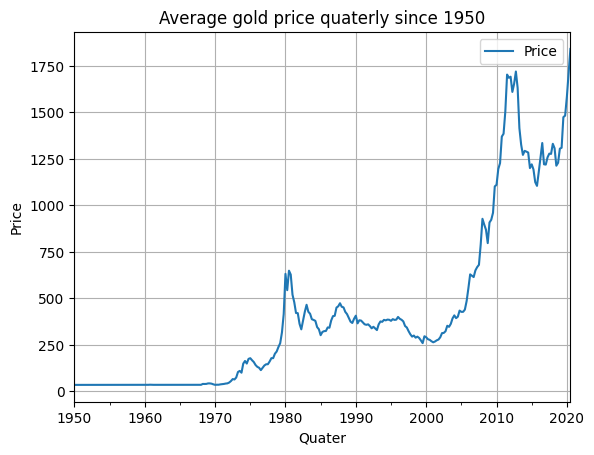

In [21]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("Average gold price quaterly since 1950")
plt.xlabel("Quater")
plt.ylabel("Price")
plt.grid()
plt.show()

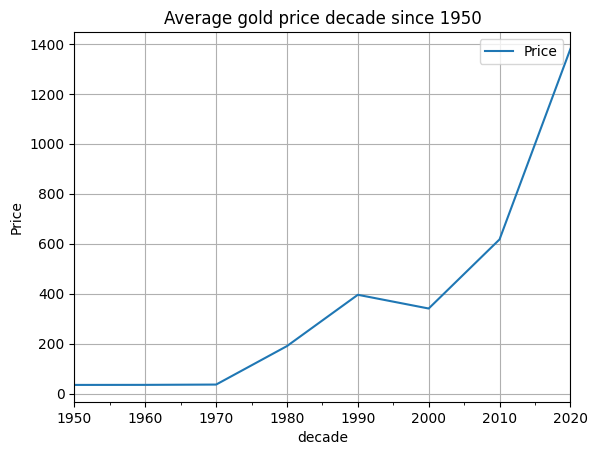

In [22]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Average gold price decade since 1950")
plt.xlabel("decade")
plt.ylabel("Price")
plt.grid()
plt.show()

In [23]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'std'}), left_index = True, right_index = True)
df_1["Cov_pct"] = ((df_1["std"]/df_1["mean"])*100).round(2)
df_1.head()



,mean,std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


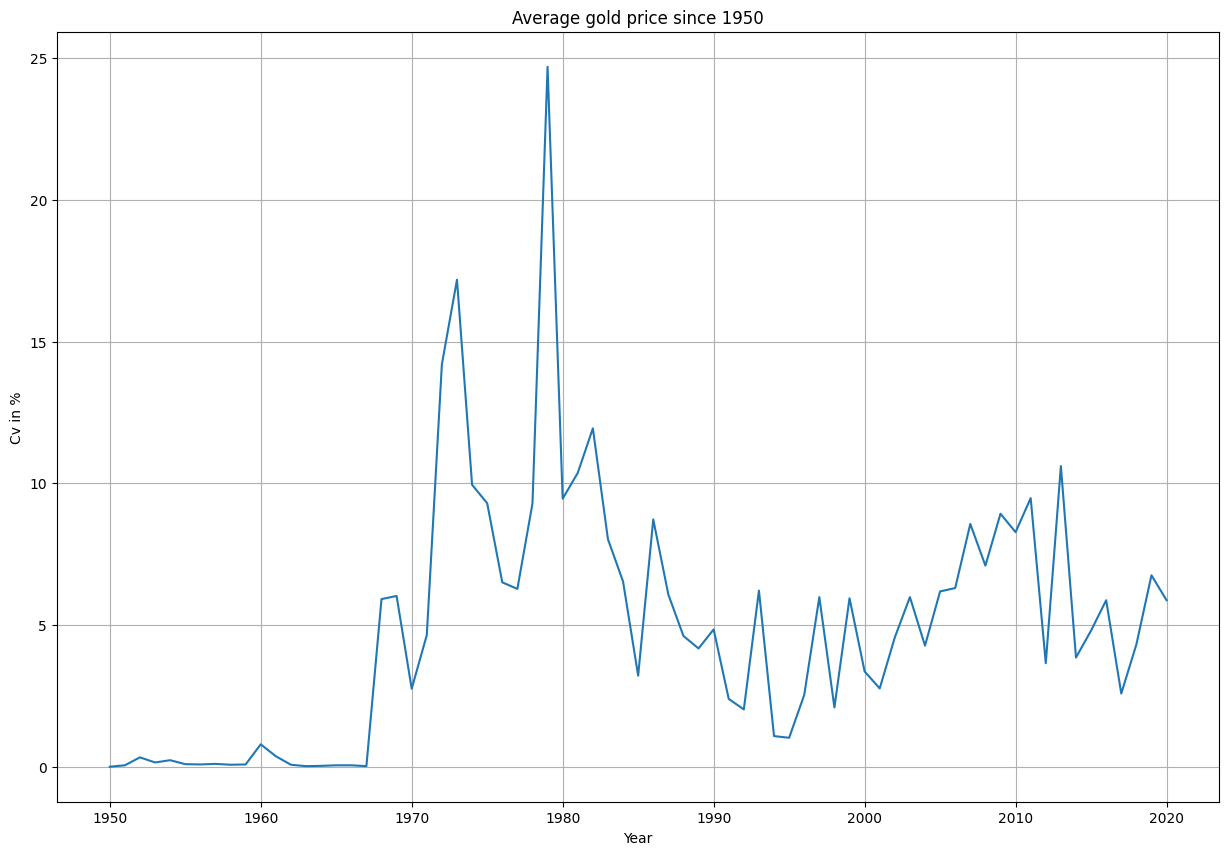

In [24]:
fig,ax = plt.subplots(figsize = (15,10))
df_1["Cov_pct"] .plot()
plt.title("Average gold price since 1950")
plt.xlabel("Year")
plt.ylabel("Cv in %")
plt.grid()
plt.show()

In [25]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [26]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


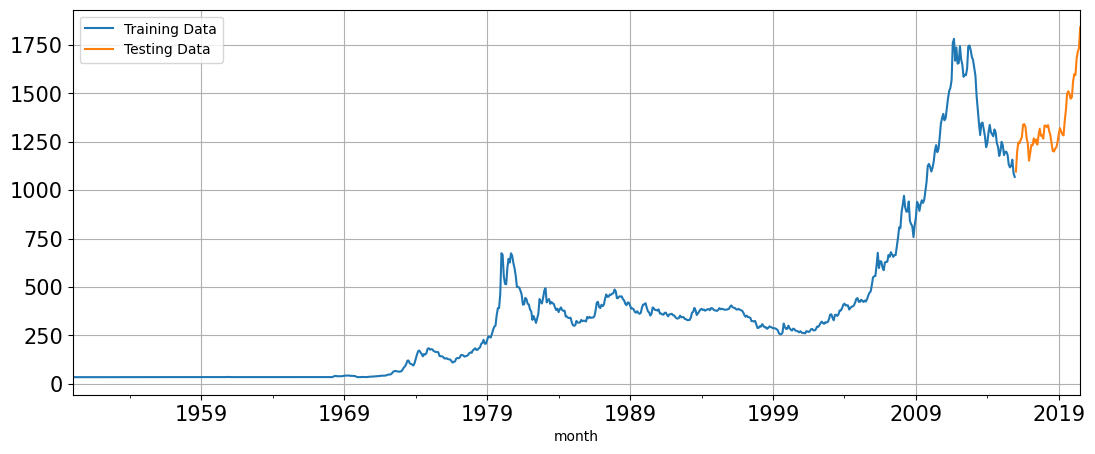

In [27]:
train["Price"].plot(figsize = (13,5),fontsize = 15)
test["Price"].plot(figsize = (13,5),fontsize = 15)
plt.grid()
plt.legend(["Training Data", "Testing Data"])
plt.show()

In [28]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [29]:
LR_train = train.copy()
LR_test = test.copy()

In [30]:
LR_train["time"] = train_time
LR_test["time"] = test_time

In [31]:
lr = LinearRegression()
lr.fit(LR_train[["time"]], LR_train["Price"].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


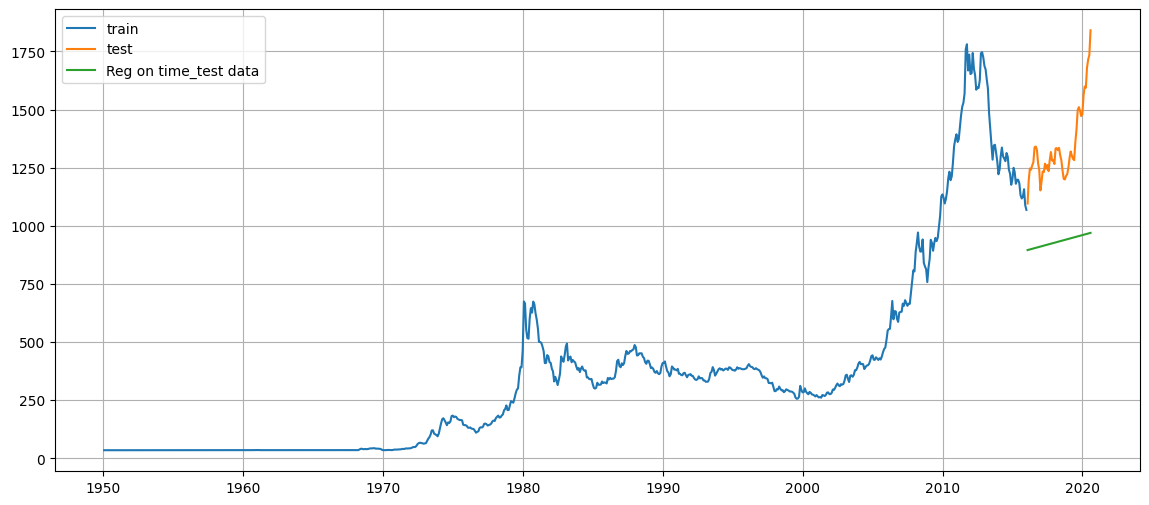

In [32]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['Forecast'] = test_predictions_model1

plt.figure(figsize= (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['Forecast'], label = 'Reg on time_test data')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [33]:
def mape(actual,pred) : return round(np.mean(np.abs((actual-pred)/actual))*100,2)

In [34]:
mape_model1_test = mape(LR_test["Price"].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 29.760 %


In [35]:
results = pd.DataFrame({"Test Mape (%)" : [mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


              Price    naive
month                       
2006-06-30  597.898  676.769
2006-07-31  633.093  676.769
2006-08-31  631.557  676.769
2006-09-30  600.150  676.769
2006-10-31  586.648  676.769


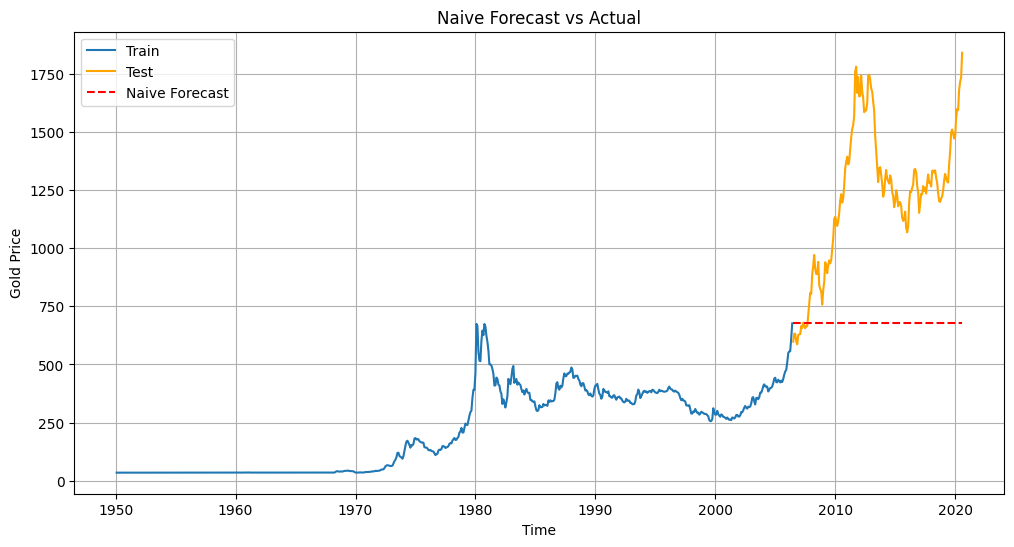

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Split into train and test
train_size = int(len(df) * 0.8)   # 80% train, 20% test
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# ✅ 2. Get last train value
last_train_value = train["Price"].iloc[-1]

# ✅ 3. Naive forecast = last train value for all test points
Naive_train = train.copy()
Naive_test = test.copy()

Naive_train["naive"] = last_train_value
Naive_test["naive"] = last_train_value

# ✅ 4. Check results
print(Naive_test.head())

# ✅ 5. Plot actual vs naive
plt.figure(figsize=(12,6))
plt.plot(train.index, train["Price"], label="Train")
plt.plot(test.index, test["Price"], label="Test", color="orange")
plt.plot(test.index, Naive_test["naive"], label="Naive Forecast", color="red", linestyle="--")
plt.title("Naive Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.grid()
plt.show()

In [37]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level= 0.4,
                                                              smoothing_trend= 0.3,
                                                              smoothing_seasonal= 0.6)

In [38]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.23


In [39]:
predictions = final_model.forecast(steps=len(test))

In [40]:
pred_df = pd.DataFrame({'lower_CI' : predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':predictions,
                        'upper _CI: ':predictions + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper _CI:
2020-08-31,1684.722153,1792.873129,1901.024104
2020-09-30,1615.309735,1723.460710,1831.611685
2020-10-31,1538.573100,1646.724075,1754.875050
2020-11-30,1476.765031,1584.916007,1693.066982
2020-12-31,1459.334548,1567.485523,1675.636498


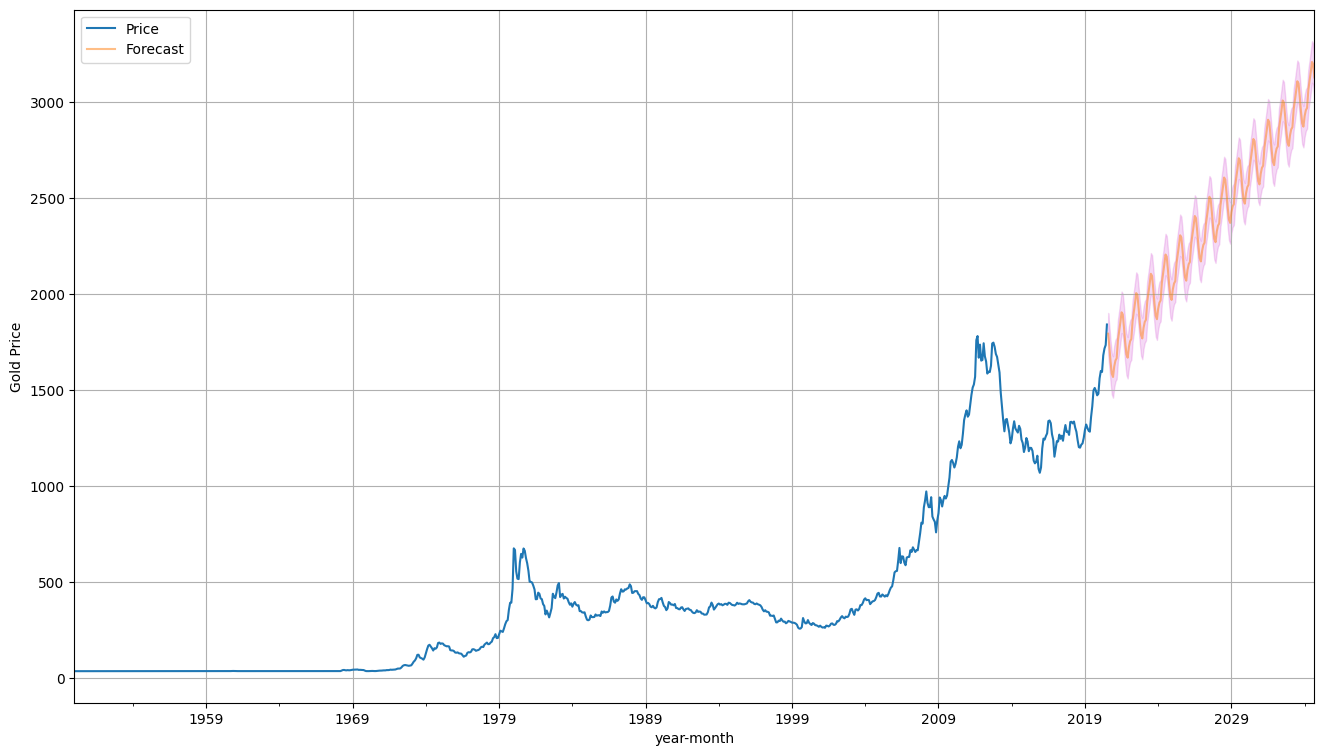

In [41]:
axis = df.plot(label = 'Acutal', figsize = (16,9))
pred_df['prediction'].plot(ax = axis,label= 'Forecast',alpha = 0.5)

axis.fill_between(pred_df.index,
                  pred_df['lower_CI'],
                  pred_df['upper _CI: '],
                  color = 'm',
                  alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Gold Price')
plt.legend(loc ='best')
plt.grid()
plt.show()